## Sanya Garg (2022UCA1826)
## AIHT Task 13

Global Happiness Report Analysis

● Use the World Happiness Report to analyze correlations between happiness and
factors like GDP, social support, and life expectancy.

● Create scatterplots, correlation matrices, and maps for visualization.

In [ ]:
# Install required libraries (if not already installed)
if (!require(tidyverse)) install.packages("tidyverse", dependencies=TRUE)
if (!require(corrplot)) install.packages("corrplot", dependencies=TRUE)
if (!require(ggmap)) install.packages("ggmap", dependencies=TRUE)
if (!require(maps)) install.packages("maps", dependencies=TRUE)

# Load libraries
library(tidyverse)
library(corrplot)
library(ggplot2)
library(ggmap)
library(maps)

Rows: 156
Columns: 9
$ Overall.rank                 <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…
$ Country.or.region            <chr> "Finland", "Denmark", "Norway", "Iceland"…
$ Score                        <dbl> 7.769, 7.600, 7.554, 7.494, 7.488, 7.480,…
$ GDP.per.capita               <dbl> 1.340, 1.383, 1.488, 1.380, 1.396, 1.452,…
$ Social.support               <dbl> 1.587, 1.573, 1.582, 1.624, 1.522, 1.526,…
$ Healthy.life.expectancy      <dbl> 0.986, 0.996, 1.028, 1.026, 0.999, 1.052,…
$ Freedom.to.make.life.choices <dbl> 0.596, 0.592, 0.603, 0.591, 0.557, 0.572,…
$ Generosity                   <dbl> 0.153, 0.252, 0.271, 0.354, 0.322, 0.263,…
$ Perceptions.of.corruption    <dbl> 0.393, 0.410, 0.341, 0.118, 0.298, 0.343,…


`geom_smooth()` using formula = 'y ~ x'


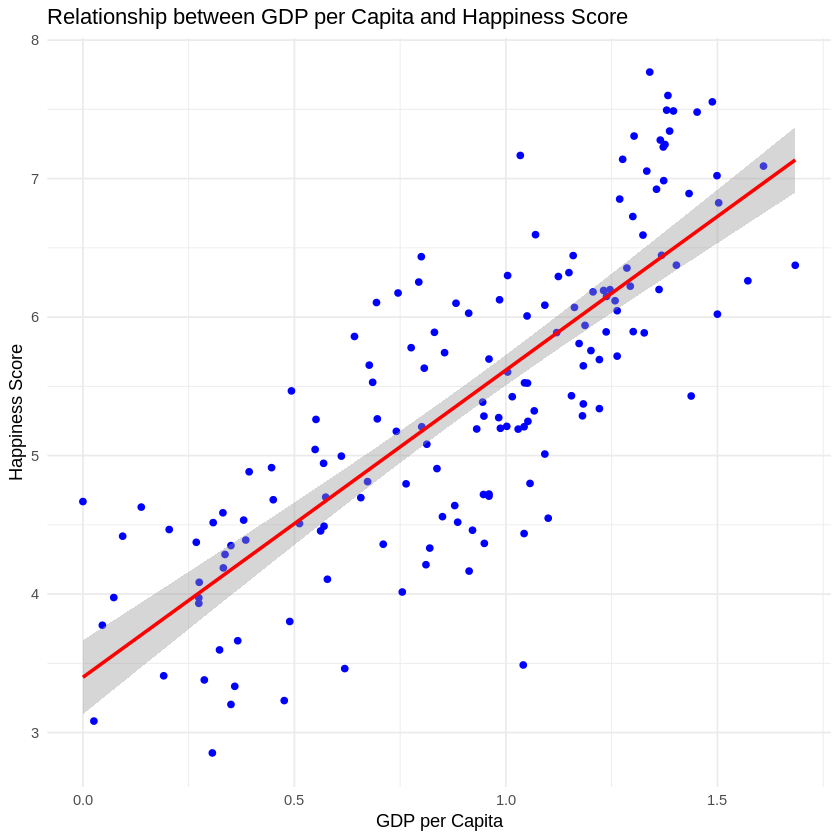

In [ ]:
# Read dataset
data_path <- "2019.csv"  # Make sure to upload this file to Colab first
happiness_data <- read.csv(data_path)

glimpse(happiness_data)

# Scatter plot: GDP per Capita vs Happiness Score
ggplot(happiness_data, aes(x = GDP.per.capita, y = Score)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +  # Regression line
  labs(
    title = "Relationship between GDP per Capita and Happiness Score",
    x = "GDP per Capita",
    y = "Happiness Score"
  ) +
  theme_minimal()


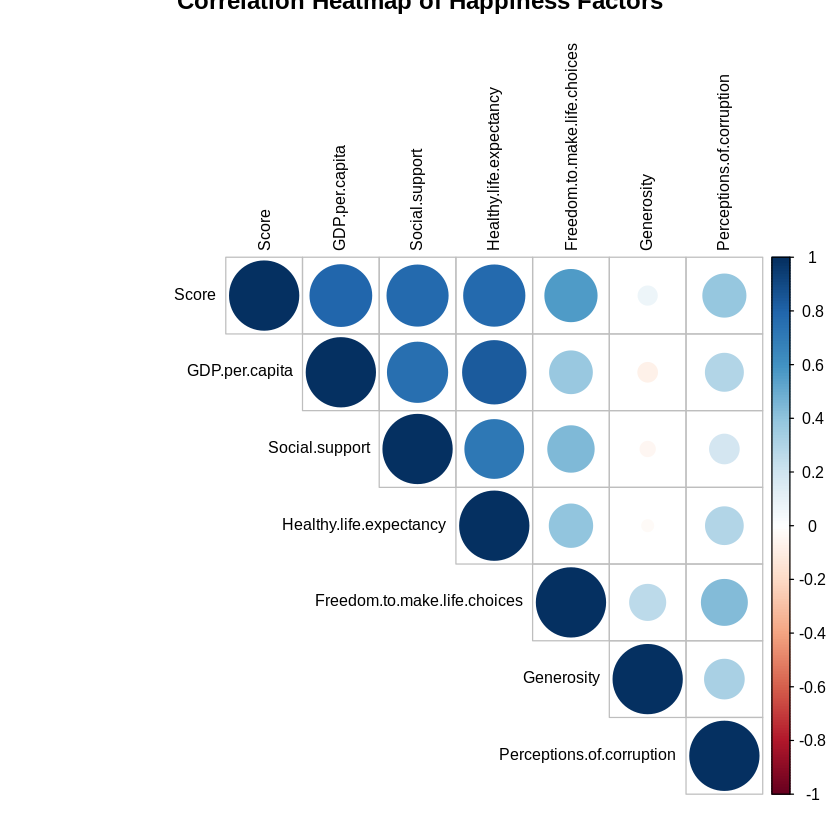

In [ ]:
# Correlation matrix
correlation_matrix <- happiness_data %>%
  select(Score, GDP.per.capita, Social.support, Healthy.life.expectancy,
         Freedom.to.make.life.choices, Generosity, Perceptions.of.corruption) %>%
  cor()

corrplot(correlation_matrix, method = "circle", type = "upper",
         tl.col = "black", tl.cex = 0.8, title = "Correlation Heatmap of Happiness Factors")


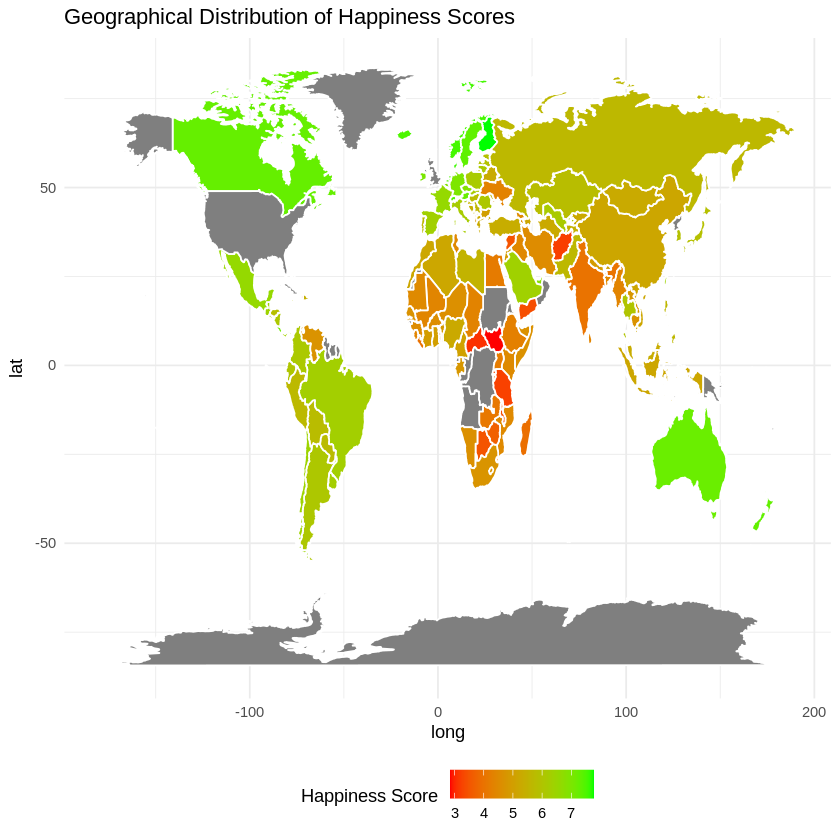

In [ ]:
# World map visualization
world_map <- map_data("world")

happiness_map_data <- world_map %>%
  left_join(happiness_data, by = c("region" = "Country.or.region"))

ggplot(happiness_map_data, aes(x = long, y = lat, group = group, fill = Score)) +
  geom_polygon(color = "white") +
  scale_fill_gradient(low = "red", high = "green") +
  labs(title = "Geographical Distribution of Happiness Scores", fill = "Happiness Score") +
  theme_minimal() +
  theme(legend.position = "bottom")